---
#  **Exploratory Data Analysis** <a class="anchor" id="1"></a>
---

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [47]:
Data = pd.read_csv('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/HEART DISEASE PROJECT/Data/cleaned_data_1.csv')
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,Male,typical angina,125,212,lower then 120mg/ml,ST-T wave abnormality,168,no,1.0,downsloping,2,reversable defect,0
1,53,Male,typical angina,140,203,heigher then 120mg/ml,normal,155,yes,3.1,upsloping,0,reversable defect,0
2,70,Male,typical angina,145,174,lower then 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
3,61,Male,typical angina,148,203,lower then 120mg/ml,ST-T wave abnormality,161,no,0.0,downsloping,1,reversable defect,0
4,62,Female,typical angina,138,294,heigher then 120mg/ml,ST-T wave abnormality,106,no,1.9,flat,3,normal,0


In [48]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
resting_blood_pressure,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
cholesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
max_heart_rate_achieved,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
st_depression,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2
num_major_vessels,302.0,0.718543,1.006748,0.0,0.00,0.0,1.00,4.0
target,302.0,0.543046,0.498970,0.0,0.00,1.0,1.00,1.0


In [49]:
# Create age group feature
Data['AgeGroup'] = pd.cut(Data['age'], bins=[20, 40, 60, 80], labels=['20-40', '40-60', '60-80'])

In [50]:
Data['AgeGroup'].unique()

['40-60', '60-80', '20-40']
Categories (3, object): ['20-40' < '40-60' < '60-80']

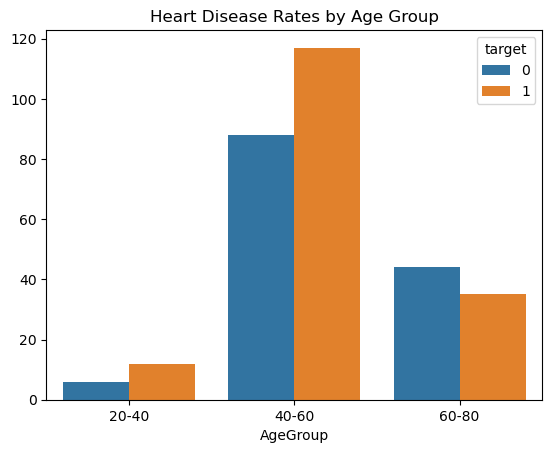

In [67]:

# Plot heart disease by age group
sns.countplot(data=Data, x='AgeGroup', hue='target')

plt.title('Heart Disease Rates by Age Group')
plt.ylabel('')
plt.show()

Observation:

1. Most Heart Diease Rates indicated AgeGroup (40-60)
2. Very few Heart Diease Rates indicated AgeGroup (20-40)


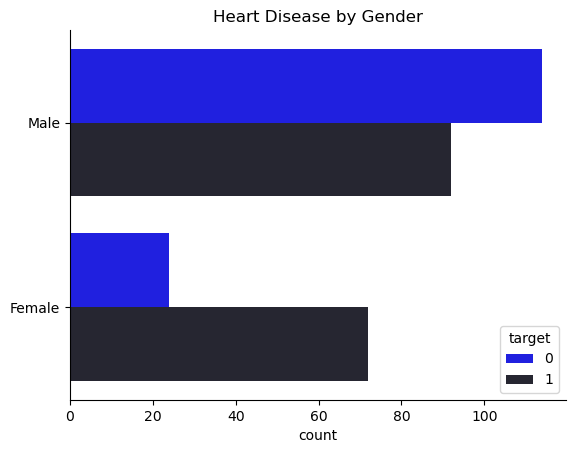

In [52]:
# Plot heart disease rates by gender


sns.countplot(data=Data, y='sex', hue='target', palette= 'dark:b_r')
sns.despine()

plt.ylabel('')
plt.title('Heart Disease by Gender')

plt.show()

Observation:

1. Disease indicated mostly female

In [53]:
### Create a list including only categorical features

cat_features = [feature for feature in Data.columns if Data[feature].dtypes == 'O']
cat_features

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_electrocardiogram',
 'exercise_induced_angina',
 'st_slope',
 'thalassemia']

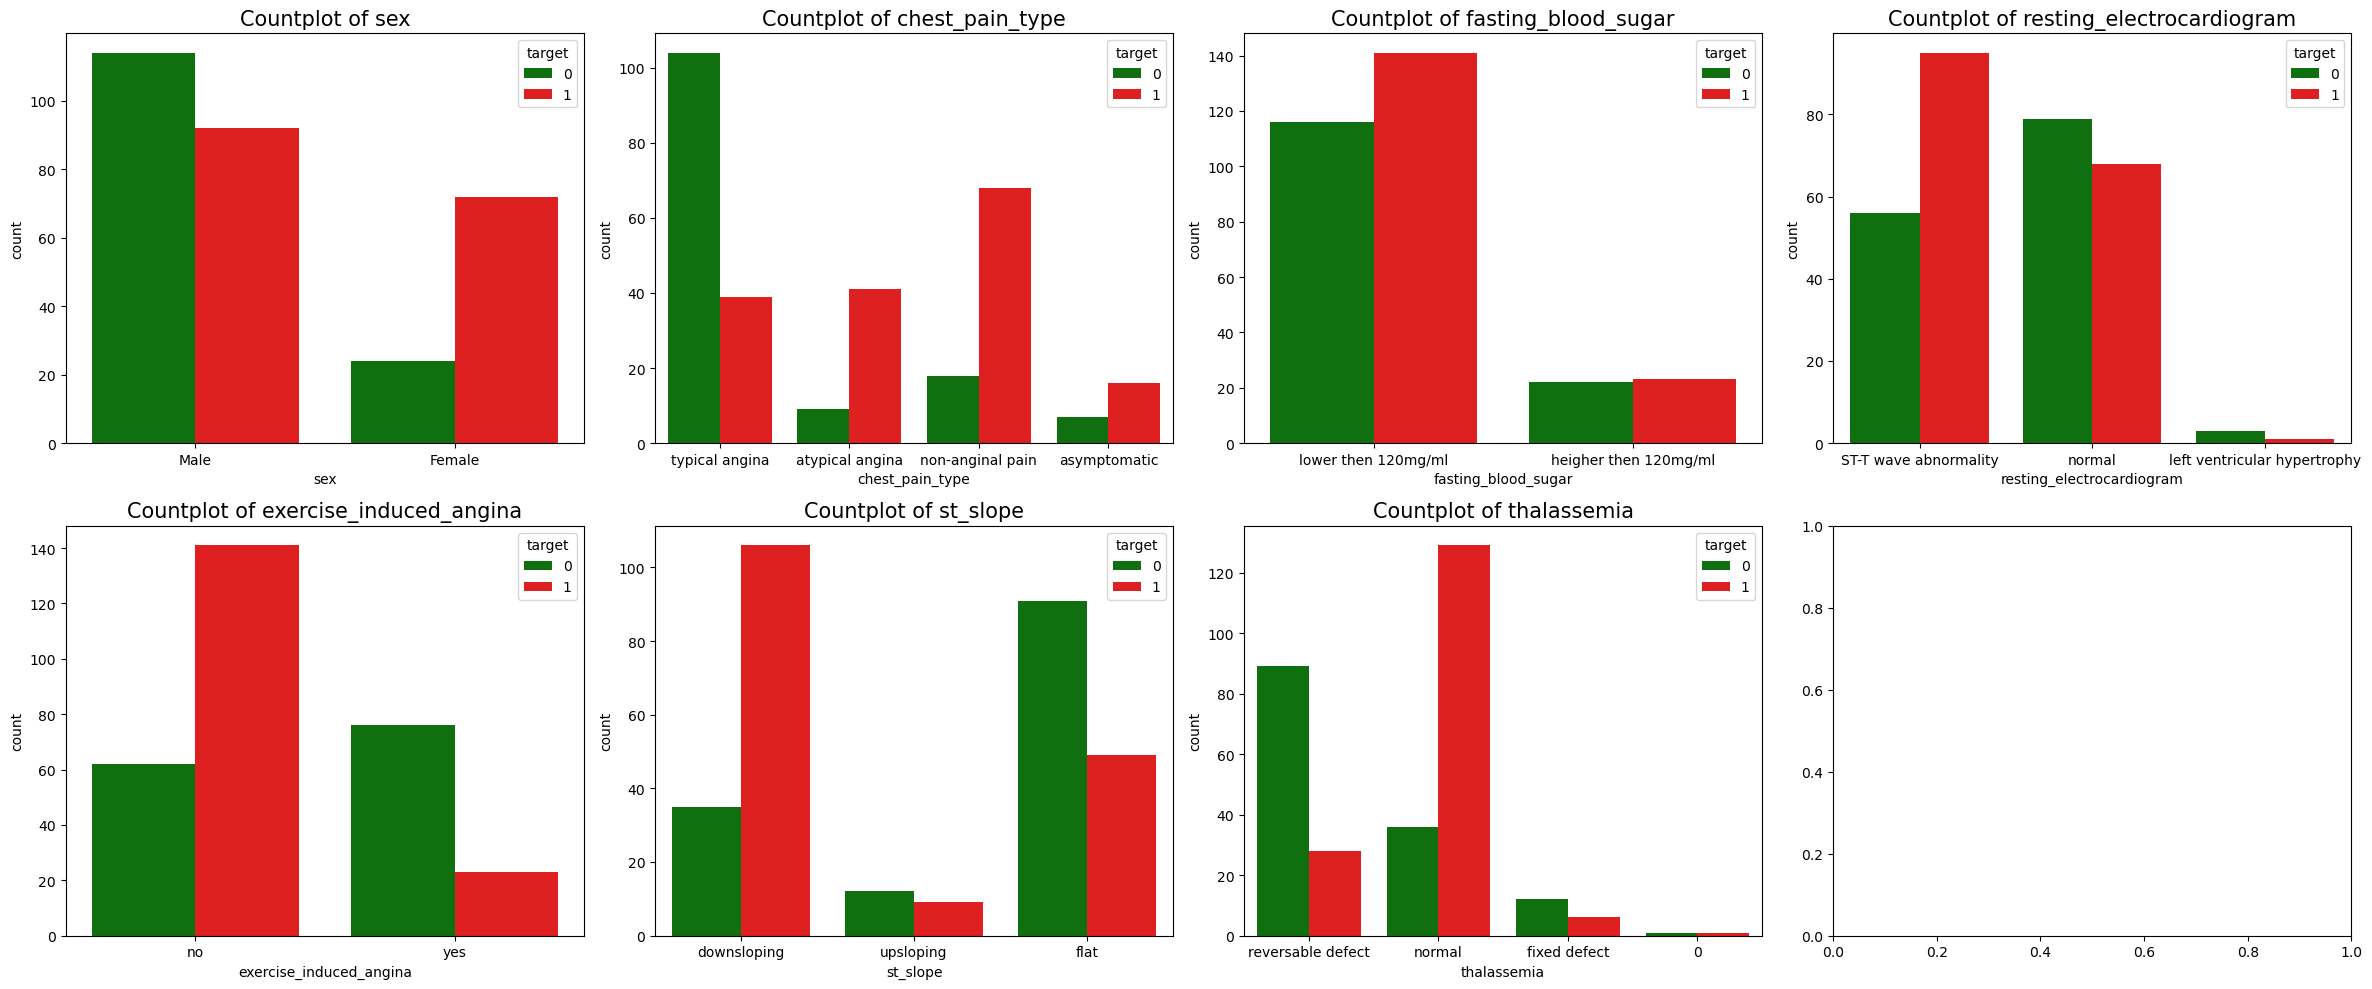

In [105]:
# Create a 2x4 grid for the subplots
fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # Adjust figure size

# Flatten the axes array to easily iterate
axes = axes.flatten()

# Loop through each feature and corresponding subplot axis
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='target', data=Data, ax=axes[i],  palette=['g','r'])
    axes[i].set_title(f'Countplot of {feature}', fontsize = 15)  # Optional: Add titles
    

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_95837/407068230.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data.corr()


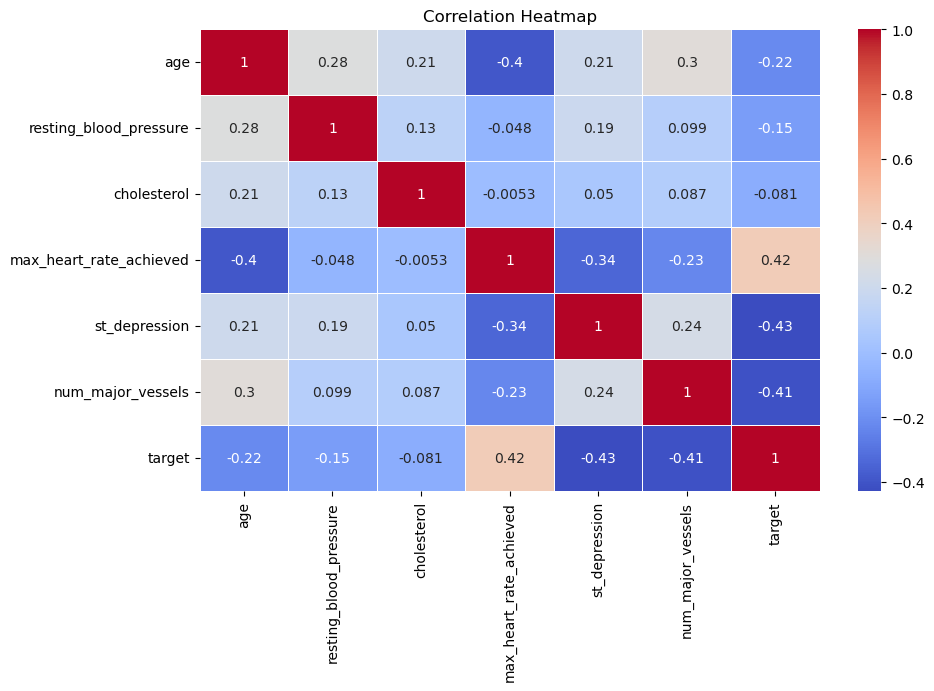

In [106]:
# Generate correlation matrix
corr = Data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()